# Model of Secondary in 2020

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pingouin as pg


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }




In [3]:
df = pd.read_csv('../data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 115.1+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


In [6]:
df["POB_VICT_CONF"].value_counts()

99    442309
1      13545
10       409
3        245
9        187
4        126
2         97
18        68
17        40
7          5
20         5
6          4
12         2
15         2
8          1
13         1
21         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

## Initial Variables

In [9]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE'

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [10]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.403860
3    0.398370
4    0.142274
1    0.055495
Name: NIVEL, dtype: float64

In [11]:
df = df[(df['NIVEL']== 3)]

In [12]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    1.0
Name: CODIGO_METODOLOGIA, dtype: float64

In [13]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Dependent$$
$$ H_{a}: The \: variables \:are \: not \: Dependent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [14]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
              Category        p-value
3    DIR_NUM_LOCALIDAD  1.300278e-130
0               GENERO   1.819574e-73
2       CODIGO_JORNADA   4.162833e-46
6           computador   4.326255e-21
5              teneviv   1.327500e-15
4  todos_servicios_Pub   1.299504e-10
1         CODIGO_ETNIA   3.257573e-03
7           tiene_auto   4.615193e-03


In [15]:
categorias = cat_dep

In [16]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


# Univariate Feature Selection for continous data
## Difference in means test 
### Part I: Features with dependence against REPITENTE

In [17]:
differentMean = pd.DataFrame(columns = ['numeric', 'p-value'])
cat_con = []
p_valuesc = []

for i in variables:
    df_r = df[df["REPITENTE"] == 1][i]
    df_nr = df[df["REPITENTE"] == 0][i]
    p_val = float(pg.ttest(df_r,df_nr)["p-val"][0])
    
    if p_val <= 0.05:
        cat_con.append(i)
        p_valuesc.append(p_val)
        
print('Dependent variables that reject H0 at a significance level of 5%')
differentMean['numeric'] = cat_con
differentMean['p-value'] = p_valuesc
print(differentMean.sort_values(by = 'p-value'))


/opt/conda/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dependent variables that reject H0 at a significance level of 5%
                    numeric       p-value
0                      EDAD  0.000000e+00
4         ALUMN_POR_DOCENTE  2.700831e-38
2          puntaje_sisben_3  1.889205e-35
7              promepuntaje  1.493041e-34
6  PROP_DOCENTES_CON_TITULO  1.308073e-15
1                   estrato  9.569245e-08
5           COMPU_POR_ALUMN  2.520709e-05
3      TOTAL_EQUIPO_COMPUTO  2.484959e-03


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

### Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.

**Box- Tidwell Test**

In [18]:
y = df['REPITENTE']
y.shape

(182074,)

In [19]:
X = df[variables]
X.shape

(182074, 10)

In [20]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

<ipython-input-21-a73a6ccc77d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [22]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [23]:
X_cons = sm.add_constant(X, prepend=False)

In [24]:
## Should not print anything
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [25]:
## Shouel not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [26]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                            GLM   Df Residuals:                   182053
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38745.
Date:                Mon, 04 Jul 2022   Deviance:                       77490.
Time:                        18:56:32   Pearson chi2:                 1.73e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02875
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        8.7931      0.366     23.999      0.000       8.075       9.511
estrato                                                    -0.7419      0.126     -5.872      0.000      -0.990      -0.494
puntaje_sisben_3                                           -0.0022      0.013     -0.170      0.865      -0.027       0.023
indice_hacinamiento                                         0.0842      0.056      1.508      0.131      -0.025       0.194
TOTAL_EQUIPO_COMPUTO                                        0.0064      0.001      4.741      0.000       0.004       0.009
ALUMN_POR_DOCENTE                                           0.5438      0.073      7.447      0.000       0.401       0.687
COMPU_POR_ALUMN                                             0.3179      0.095      3.359      0.001       0.132       0.503
TOTAL_DOCENTES_CON_TITULO                                  -0.0068      0.004     -1.760      0.078      -0.014       0.001
PROP_DOCENTES_CON_TITULO                                    0.6832      0.085      8.076      0.000       0.517       0.849
promepuntaje                                                1.0462      0.120      8.726      0.000       0.811       1.281
EDAD:Log_EDAD                                              -2.3158      0.101    -22.935      0.000      -2.514      -2.118
estrato:Log_estrato                                         0.4173      0.078      5.376      0.000       0.265       0.569
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0005      0.003     -0.186      0.853      -0.006       0.005
indice_hacinamiento:Log_indice_hacinamiento                -0.0229      0.024     -0.960      0.337      -0.070       0.024
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0010      0.000     -5.345      0.000      -0.001      -0.001
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1353      0.018     -7.708      0.000      -0.170      -0.101
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                        -1.5156      0.267     -5.670      0.000      -2.039      -0.992
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0017      0.001      2.208      0.027       0.000       0.003
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -0.8496      0.168     -5.053      0.000      -1.179      -0.520
promepuntaje:Log_promepuntaje                              -0.1610      0.018     -8.772      0.000      -0.197      -0.125
const                                                     -82.2065      4.842    -16.977      0.000     -91.697     -72.716
===========================================================================================================

In [27]:
logit_results.pvalues

EDAD                                                       2.881041e-127
estrato                                                     4.307689e-09
puntaje_sisben_3                                            8.649588e-01
indice_hacinamiento                                         1.314720e-01
TOTAL_EQUIPO_COMPUTO                                        2.127847e-06
ALUMN_POR_DOCENTE                                           9.554826e-14
COMPU_POR_ALUMN                                             7.810500e-04
TOTAL_DOCENTES_CON_TITULO                                   7.833695e-02
PROP_DOCENTES_CON_TITULO                                    6.674719e-16
promepuntaje                                                2.637954e-18
EDAD:Log_EDAD                                              2.058374e-116
estrato:Log_estrato                                         7.605833e-08
puntaje_sisben_3:Log_puntaje_sisben_3                       8.526553e-01
indice_hacinamiento:Log_indice_hacinamiento        

In [28]:
logit_results.pvalues[logit_results.pvalues > 0.05]

puntaje_sisben_3                               0.864959
indice_hacinamiento                            0.131472
TOTAL_DOCENTES_CON_TITULO                      0.078337
puntaje_sisben_3:Log_puntaje_sisben_3          0.852655
indice_hacinamiento:Log_indice_hacinamiento    0.336835
dtype: float64

In [29]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['puntaje_sisben_3', 'indice_hacinamiento', 'TOTAL_DOCENTES_CON_TITULO',
       'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento'],
      dtype='object')

In [30]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['puntaje_sisben_3', 'indice_hacinamiento']

In [31]:
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [32]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [33]:
X_cons['REPITENTE'] = y

In [34]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento)'

In [35]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.226899
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                          Logit   Df Residuals:                   182069
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                0.002131
Time:                        18:56:34   Log-Likelihood:                -41312.
converged:                       True   LL-Null:                       -41401.
Covariance Type:            nonrobust   LLR p-value:                 4.330e-37
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -2.6182      0.124    -21.092      0.000      -2.861      -2.375
puntaje_sisben_3                                    0.0096      0.012      0.768      0.442      -0.015       0.034
puntaje_sisben_3:np.log(puntaje_sisben_3)          -0.0034      0.003     -1.274      0.203      -0.009       0.002
indice_hacinamiento                                -0.0348      0.053     -0.656      0.512      -0.139       0.069
indice_hacinamiento:np.log(indice_hacinamiento)     0.0308      0.023      1.366      0.172      -0.013       0.075
===================================================================================================================
"""

In [36]:
model.pvalues[model.pvalues > 0.05]

puntaje_sisben_3                                   0.442475
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.202582
indice_hacinamiento                                0.512035
indice_hacinamiento:np.log(indice_hacinamiento)    0.172089
dtype: float64

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same reference as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [37]:
all_variables = variables + categorias
y = df['REPITENTE']
X = df[all_variables]


In [38]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                            GLM   Df Residuals:                   182070
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42012.
Date:                Mon, 04 Jul 2022   Deviance:                       84024.
Time:                        18:56:36   Pearson chi2:                 2.04e+05
No. Iterations:                     6   Pseudo R-squ. (CS):          -0.006739
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0212      0.001    -35.355      0.000      -0.022      -0.020
indice_hacinamiento    -0.2018      0.007    -29.607      0.000      -0.215      -0.188
GENERO                  0.2053      0.019     10.775      0.000       0.168       0.243
CODIGO_ETNIA            0.0753      0.040      1.865      0.062      -0.004       0.154
CODIGO_JORNADA         -0.2195      0.008    -27.796      0.000      -0.235      -0.204
DIR_NUM_LOCALIDAD      -0.0249      0.002    -13.586      0.000      -0.029      -0.021
todos_servicios_Pub    -0.4092      0.024    -17.224      0.000      -0.456      -0.363
teneviv                -0.1176      0.011    -10.983      0.000      -0.139      -0.097
computador             -0.1356      0.030     -4.563      0.000      -0.194      -0.077
tiene_auto              0.0569      0.074      0.771      0.441      -0.088       0.202
=======================================================================================
"""

In [39]:
# Get influence measures
influence = logit_results.get_influence()

In [40]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [41]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-41-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-41-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [42]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [43]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
45754,0.003790,4.243982
288532,0.003643,3.529608
287131,0.003598,3.575493
287726,0.003581,3.591959
120572,0.003466,3.225385


In [44]:
extreme.shape

(8551, 2)

In [45]:
extreme.index

Int64Index([    73,     77,     83,    156,    168,    183,    186,    187,
               188,    189,
            ...
            453872, 453883, 453884, 454098, 454194, 455356, 455364, 455391,
            455412, 455419],
           dtype='int64', length=8551)

In [46]:
df.index

Int64Index([    12,     27,     29,     30,     31,     32,     33,     35,
                40,     41,
            ...
            457035, 457036, 457037, 457038, 457040, 457042, 457043, 457044,
            457045, 457046],
           dtype='int64', length=182074)

In [47]:
# Delete undesirable outliers
df = df.loc[~df.index.isin(extreme.index)]

In [48]:
df.index

Int64Index([    12,     27,     29,     30,     31,     32,     33,     35,
                40,     41,
            ...
            457035, 457036, 457037, 457038, 457040, 457042, 457043, 457044,
            457045, 457046],
           dtype='int64', length=173523)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-49-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


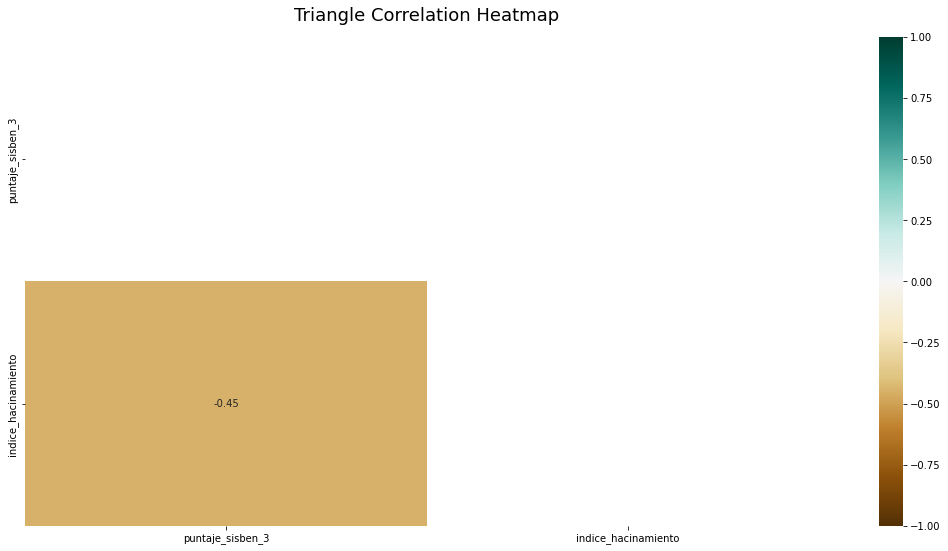

In [49]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,puntaje_sisben_3,2.464599
1,indice_hacinamiento,2.464605


In [51]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >5
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [52]:
variables

['puntaje_sisben_3', 'indice_hacinamiento']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [53]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [54]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,4
1,CODIGO_ETNIA,1
4,todos_servicios_Pub,1
5,teneviv,1
7,tiene_auto,1
2,CODIGO_JORNADA,0
3,DIR_NUM_LOCALIDAD,0
6,computador,0


In [55]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,4,CODIGO_ETNIA
1,CODIGO_ETNIA,1,todos_servicios_Pub
4,todos_servicios_Pub,1,teneviv
5,teneviv,1,tiene_auto
7,tiene_auto,1,CODIGO_JORNADA
2,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD
3,DIR_NUM_LOCALIDAD,0,computador
6,computador,0,NaN


In [56]:
independent = independent.reset_index()

In [57]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [58]:
vals.append(1)

In [59]:
independent['p_values'] = vals

In [60]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,4,CODIGO_ETNIA,6.366832e-01
1,1,CODIGO_ETNIA,1,todos_servicios_Pub,1.234826e-07
2,4,todos_servicios_Pub,1,teneviv,0.000000e+00
3,5,teneviv,1,tiene_auto,0.000000e+00
4,7,tiene_auto,1,CODIGO_JORNADA,4.515983e-12
5,2,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD,0.000000e+00
6,3,DIR_NUM_LOCALIDAD,0,computador,0.000000e+00
7,6,computador,0,NaN,1.000000e+00


In [61]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

1


In [62]:
cat_iid

['GENERO', 'CODIGO_ETNIA']

In [63]:
categorias = cat_iid

------------------

### Run Models

In [64]:
def formula_maker(dependiente, variables, categorias):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
    for categoria in categorias:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'C({categoria})'
    return formula  

In [65]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
model.summary()

Optimization terminated successfully.
         Current function value: 0.063039
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               173523
Model:                          Logit   Df Residuals:                   173513
Method:                           MLE   Df Model:                            9
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.1361
Time:                        18:56:43   Log-Likelihood:                -10939.
converged:                       True   LL-Null:                       -12662.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7083      0.093     -7.644      0.000      -0.890      -0.527
C(GENERO)[T.1]           0.9764      0.046     21.107      0.000       0.886       1.067
C(CODIGO_ETNIA)[T.1]     0.3439      0.278      1.239      0.215      -0.200       0.888
C(CODIGO_ETNIA)[T.2]     0.9810      0.230      4.262      0.000       0.530       1.432
C(CODIGO_ETNIA)[T.3]   -81.1071   4.63e+18  -1.75e-17      1.000   -9.07e+18    9.07e+18
C(CODIGO_ETNIA)[T.4]     2.4461      0.619      3.951      0.000       1.233       3.660
C(CODIGO_ETNIA)[T.5]     0.5188      0.519      1.000      0.317      -0.498       1.536
C(CODIGO_ETNIA)[T.6]   -56.9995   1.88e+13  -3.03e-12      1.000   -3.69e+13    3.69e+13
puntaje_sisben_3        -0.0858      0.002    -47.530      0.000      -0.089      -0.082
indice_hacinamiento     -0.4863      0.020    -23.792      0.000      -0.526      -0.446
========================================================================================
"""

In [66]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
model.summary()

         Current function value: 0.063119
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 47


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               173523
Model:                          Logit   Df Residuals:                   173513
Method:                           MLE   Df Model:                            9
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.1350
Time:                        18:56:47   Log-Likelihood:                -10953.
converged:                      False   LL-Null:                       -12662.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7325      0.092     -7.927      0.000      -0.914      -0.551
C(GENERO)[T.1]           0.8914      0.046     19.539      0.000       0.802       0.981
C(CODIGO_ETNIA)[T.1]     0.0394      0.318      0.124      0.901      -0.583       0.662
C(CODIGO_ETNIA)[T.2]     0.1384      0.331      0.418      0.676      -0.510       0.787
C(CODIGO_ETNIA)[T.3] -8.947e-05     10.983  -8.15e-06      1.000     -21.526      21.526
C(CODIGO_ETNIA)[T.4]     0.0391      1.384      0.028      0.977      -2.673       2.751
C(CODIGO_ETNIA)[T.5]     0.0165      0.648      0.026      0.980      -1.253       1.286
C(CODIGO_ETNIA)[T.6]    -0.0002      7.957  -1.94e-05      1.000     -15.596      15.596
puntaje_sisben_3        -0.0837      0.002    -46.762      0.000      -0.087      -0.080
indice_hacinamiento     -0.4749      0.020    -23.254      0.000      -0.515      -0.435
========================================================================================
"""

In [67]:
all_vars = variables + categorias

In [68]:
X = df[all_vars]

In [69]:
X

,puntaje_sisben_3,indice_hacinamiento,GENERO,CODIGO_ETNIA
12,52.509998,3.000000,1,0
27,42.570000,2.000000,1,0
29,43.540001,3.000000,1,0
30,30.969999,2.000000,1,0
31,24.910000,3.000000,1,0
...,...,...,...,...
457042,65.589996,3.000000,1,0
457043,53.740002,1.500000,1,0
457044,30.570000,2.500000,0,0
457045,50.430000,2.666016,1,0


In [70]:
y = df['REPITENTE']
y

12        0
27        0
29        0
30        0
31        0
         ..
457042    0
457043    0
457044    0
457045    0
457046    0
Name: REPITENTE, Length: 173523, dtype: uint8

In [71]:
X = pd.get_dummies(X, columns=categorias, drop_first=True)
X.head(2)

,puntaje_sisben_3,indice_hacinamiento,GENERO_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6
12,52.509998,3.0,1,0,0,0,0,0,0
27,42.570000,2.0,1,0,0,0,0,0,0


In [72]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               173523
Model:                            GLM   Df Residuals:                   173521
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10968.
Date:                Mon, 04 Jul 2022   Deviance:                       21936.
Time:                        18:56:54   Pearson chi2:                 1.27e+05
No. Iterations:                    20   Pseudo R-squ. (CS):            0.01933
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0956      0.001    -72.390      0.000      -0.098      -0.093
indice_hacinamiento    -0.6114      0.013    -46.216      0.000      -0.637      -0.585
GENERO_1                0.8623      0.042     20.370      0.000       0.779       0.945
CODIGO_ETNIA_1          0.3133      0.279      1.122      0.262      -0.234       0.860
CODIGO_ETNIA_2          0.9575      0.232      4.133      0.000       0.503       1.412
CODIGO_ETNIA_3        -15.9099   2.04e+04     -0.001      0.999   -3.99e+04    3.99e+04
CODIGO_ETNIA_4          2.4410      0.632      3.865      0.000       1.203       3.679
CODIGO_ETNIA_5          0.4869      0.521      0.934      0.351      -0.535       1.509
CODIGO_ETNIA_6        -16.4146    1.9e+04     -0.001      0.999   -3.72e+04    3.72e+04
=======================================================================================
"""

In [73]:
variables

['puntaje_sisben_3', 'indice_hacinamiento']

In [74]:
categorias

['GENERO', 'CODIGO_ETNIA']

### Conclusions